2.Logistic Regression

Example:Diabetes

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [4]:
df=pd.read_csv('diabetes.csv')


In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

x = df[feature_cols]
y = df['Outcome']

print(x.head())
print(y.head())

   Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
0            6        0  33.6   50      148             72   
1            1        0  26.6   31       85             66   
2            8        0  23.3   32      183             64   
3            1       94  28.1   21       89             66   
4            0      168  43.1   33      137             40   

   DiabetesPedigreeFunction  
0                     0.627  
1                     0.351  
2                     0.672  
3                     0.167  
4                     2.288  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [10]:
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state=5)

display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [12]:
model= LogisticRegression(solver='lbfgs', max_iter=1000)


In [13]:

model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [14]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[88 12]
 [19 35]]
Accuracy Score :  0.7987012987012987
Accuracy in Percentage :  79 %


<Axes: xlabel='Predicted', ylabel='Actual'>

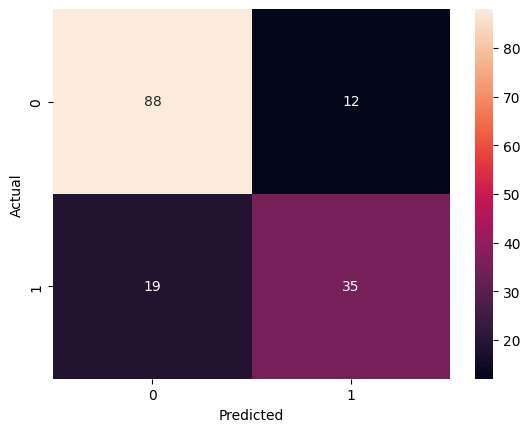

In [15]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)

Exercise 1 : Uni Admit /Not Prediction

In [16]:
import pandas as pd

df = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/dae/binary.dta")

print(df.head())


   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [17]:
print(df.columns)

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


In [18]:
feature_cols = ['gre', 'gpa', 'rank']
X = df[feature_cols]
y = df['admit']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6625


In [20]:
new_data = pd.DataFrame({'gre': [320], 'gpa': [3.6], 'rank': [2]})
prediction = model.predict(new_data)
print("Admitted" if prediction[0] == 1 else "Not Admitted")


Not Admitted


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


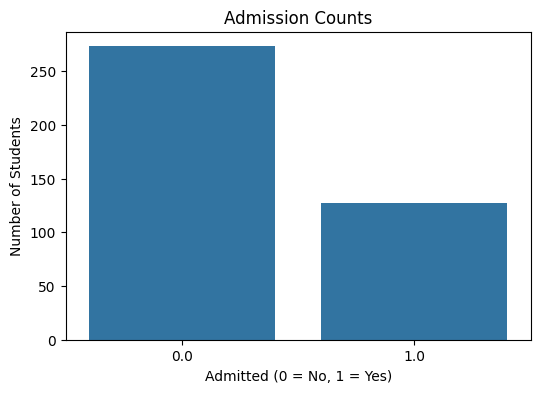

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='admit', data=df)
plt.title("Admission Counts")
plt.xlabel("Admitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")
plt.show()

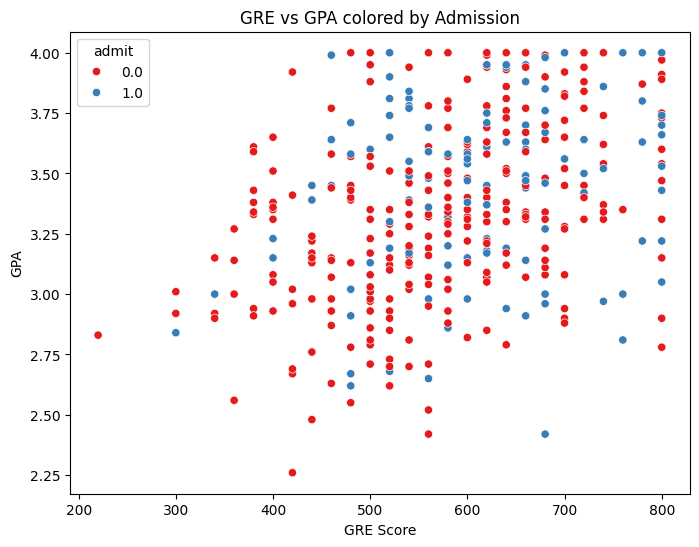

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gre', y='gpa', hue='admit', data=df, palette='Set1')
plt.title("GRE vs GPA colored by Admission")
plt.xlabel("GRE Score")
plt.ylabel("GPA")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

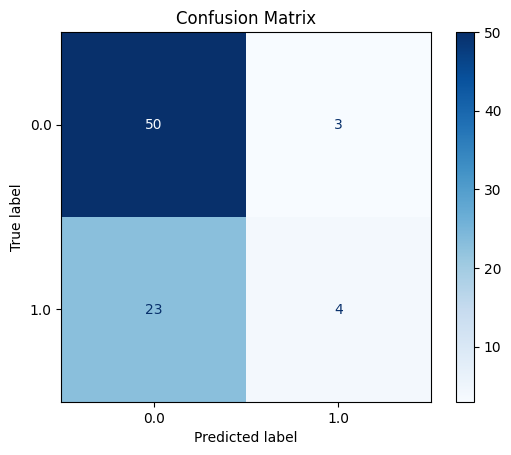

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


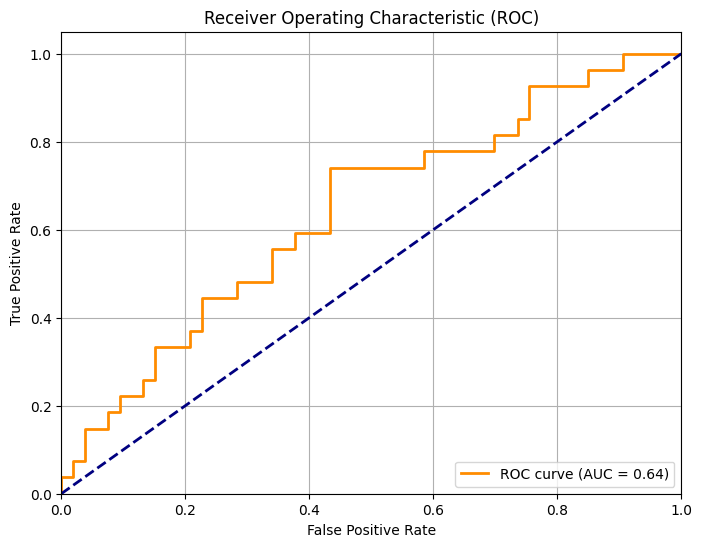

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Exercise:2 (Disease Prediction)

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


In [31]:
data = {
    'Age': [22, 25, 30, 23, 31, 27],
    'Smokes': ['Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
    'BMI': [19, 24, 28, 21, 26, 25],
    'Has Disease': [0, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

In [32]:
encoder = OneHotEncoder(sparse_output=False)
encoded_smoke = encoder.fit_transform(df[['Smokes']])
smoke_df = pd.DataFrame(encoded_smoke, columns=encoder.get_feature_names_out(['Smokes']))

In [33]:
X = pd.concat([df[['Age', 'BMI']], smoke_df], axis=1)
y = df['Has Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


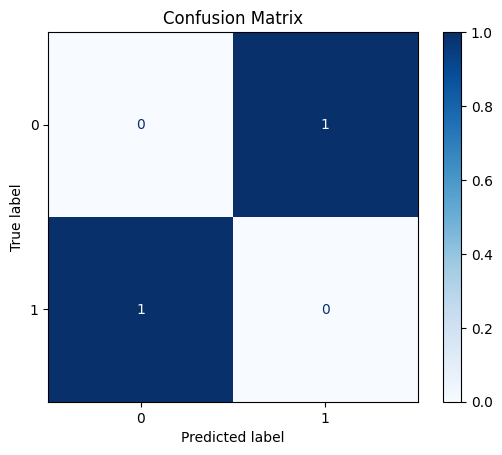

In [34]:
cm = confusion_matrix(y_test, y_pred)
labels_present = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_present)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

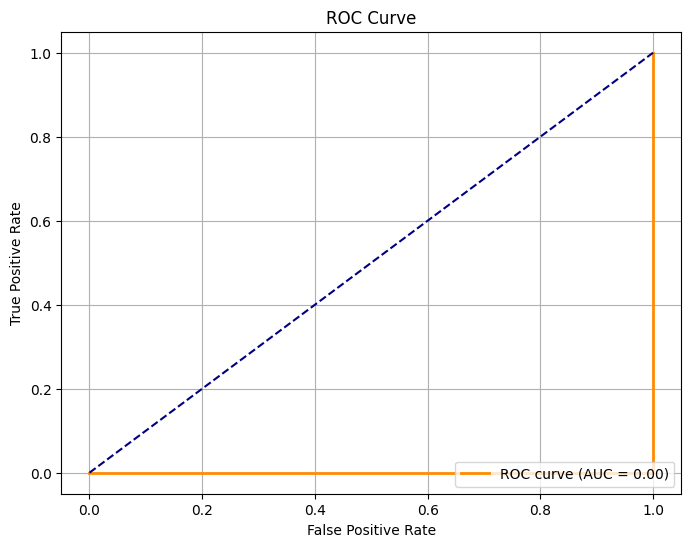

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [36]:
new = pd.DataFrame({
    'Age': [29],
    'Smokes': ['Yes'],
    'BMI': [27]
})


In [37]:
new_smoke = encoder.transform(new[['Smokes']])
new_combined = pd.concat([
    new[['Age', 'BMI']].reset_index(drop=True),
    pd.DataFrame(new_smoke, columns=encoder.get_feature_names_out(['Smokes']))
], axis=1)

new_scaled = scaler.transform(new_combined)
new_pred = model.predict(new_scaled)[0]
print("Prediction for new patient:", "Susceptible " if new_pred == 1 else "Not Susceptible ")


Prediction for new patient: Susceptible 


Exercise 3 (Product Interest)

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


In [39]:
data = {
    'Product Interest': ['Sports', 'Fashion', 'Electronics', 'Sports', 'Fashion', 'Electronics'],
    'Age': [22, 25, 30, 23, 31, 28],
    'Income': [25000, 35000, 55000, 27000, 48000, 50000],
    'Bought': [0, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

In [40]:
encoder = OneHotEncoder(sparse_output=False)
encoded_interest = encoder.fit_transform(df[['Product Interest']])
interest_df = pd.DataFrame(encoded_interest, columns=encoder.get_feature_names_out(['Product Interest']))

In [41]:
X = pd.concat([interest_df, df[['Age', 'Income']]], axis=1)
y = df['Bought']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


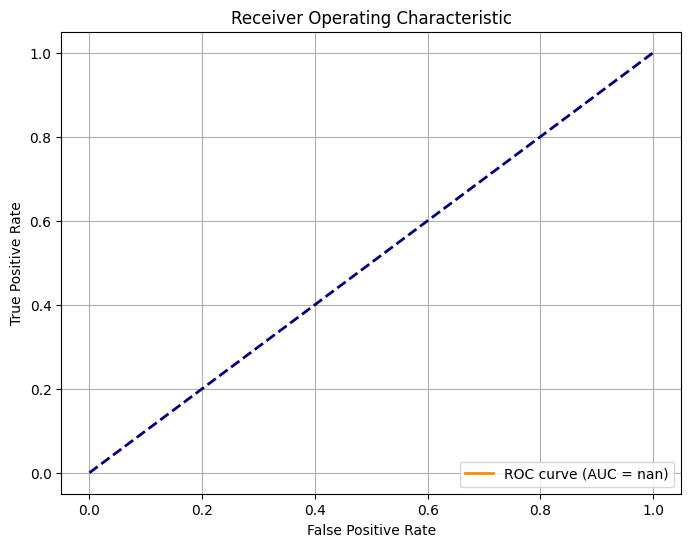

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [45]:
new = pd.DataFrame({
    'Product Interest': ['Fashion'],
    'Age': [26],
    'Income': [46000]
})

new_encoded = encoder.transform(new[['Product Interest']])
new_full = pd.concat([
    pd.DataFrame(new_encoded, columns=encoder.get_feature_names_out(['Product Interest'])),
    new[['Age', 'Income']].reset_index(drop=True)
], axis=1)

new_scaled = scaler.transform(new_full)
prediction = model.predict(new_scaled)[0]
print("Prediction for new customer:", "Will buy " if prediction == 1 else "Won't buy ")


Prediction for new customer: Will buy 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


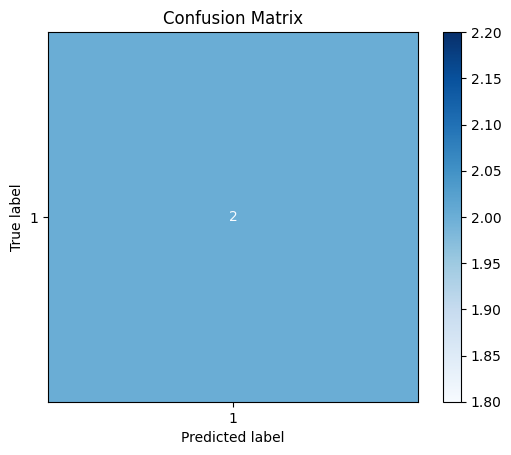

In [46]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)
labels_present = np.unique(y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_present)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
